In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Explore the training set provided
df_train = pd.read_csv('train.csv')


print('Columns = ', df_train.columns)

df_train.head()

Columns =  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Explore the test set provided
df_test = pd.read_csv("test.csv")

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
display(df_train.describe())

print("_"*40)

df_train.info()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe(include =['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644



Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

Correlating.

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

Completing.

    We may want to complete Age feature as it is definitely correlated to survival.
    We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

Correcting.

    Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
    Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
    PassengerId may be dropped from training dataset as it does not contribute to survival.
    Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

Creating.

    We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
    We may want to engineer the Name feature to extract Title as a new feature.
    We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
    We may also want to create a Fare range feature if it helps our analysis.

Classifying.

We may also add to our assumptions based on the problem description noted earlier.

    Women (Sex=female) were more likely to have survived.
    Children (Age<?) were more likely to have survived.
    The upper-class passengers (Pclass=1) were more likely to have survived.




Analyze by pivoting features

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

    Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
    Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
    SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).



In [6]:
df_train[['Pclass','Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Survived', ascending = False)  # as_index = False adds a default index column 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
df_train[['Sex','Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
df_train[['SibSp','Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
df_train[['Parch','Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000



Analyze by visualizing data

Now we can continue confirming some of our assumptions using visualizations for analyzing the data.
Correlating numerical features

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

Observations.

    Infants (Age <=4) had high survival rate.
    Oldest passengers (Age = 80) survived.
    Large number of 15-25 year olds did not survive.
    Most passengers are in 15-35 age range.

Decisions.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

    We should consider Age (our assumption classifying #2) in our model training.
    Complete the Age feature for null values (completing #1).
    We should band age groups (creating #3).



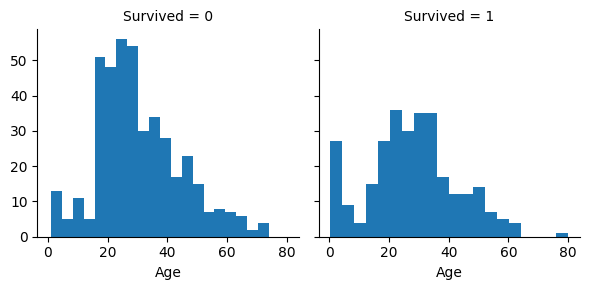

In [10]:
g = sns.FacetGrid(df_train, col = 'Survived') #Facetgrid creates multi-plot grid where cols specify the facets which will be plotted diffrently
g.map(plt.hist, 'Age', bins = 20)


Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

Observations.

    Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
    Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
    Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
    Pclass varies in terms of Age distribution of passengers.

Decisions.

    Consider Pclass for model training.



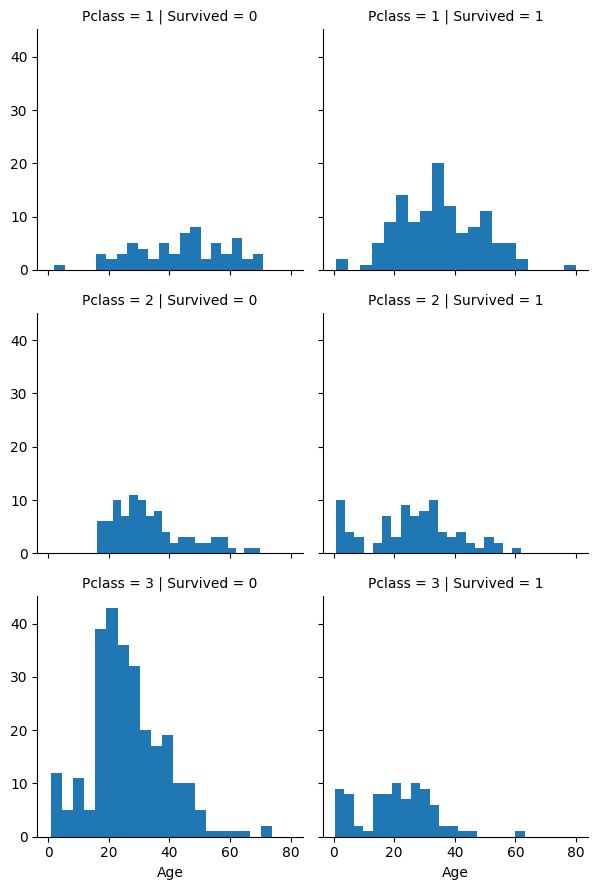

In [11]:
grid = sns.FacetGrid(df_train, col = 'Survived', row = 'Pclass')
grid.map(plt.hist, 'Age', bins = 20)
grid.add_legend()


Correlating categorical features

Now we can correlate categorical features with our solution goal.

Observations.

    Female passengers had much better survival rate than males. Confirms classifying (#1).
    Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
    Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
    Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

Decisions.

    Add Sex feature to model training.
    Complete and add Embarked feature to model training.



C:\Users\deepa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\deepa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


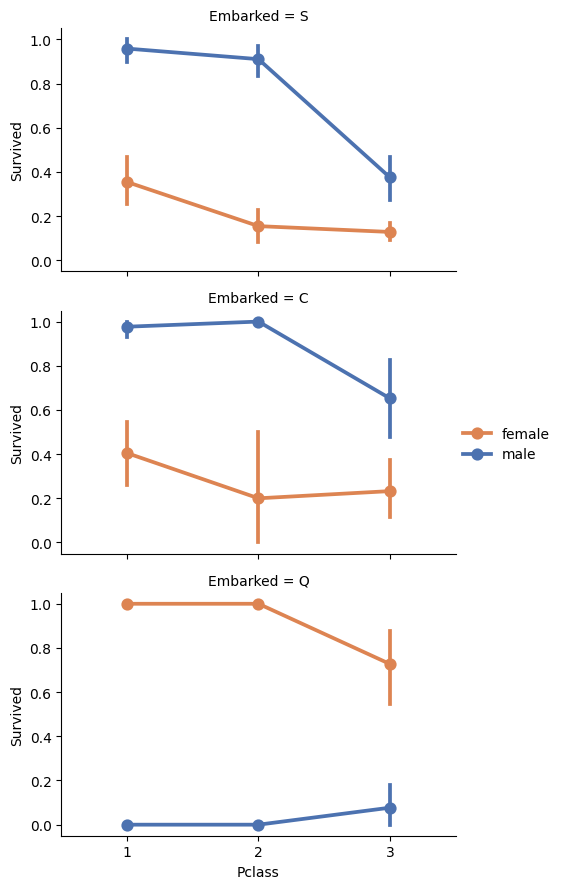

In [12]:
grid = sns.FacetGrid(df_train, row = 'Embarked',  aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',palette = 'deep')
grid.add_legend()


Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

Observations.

    Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
    Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

Decisions.

    Consider banding Fare feature.



C:\Users\deepa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\deepa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\deepa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\deepa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\deepa\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:85

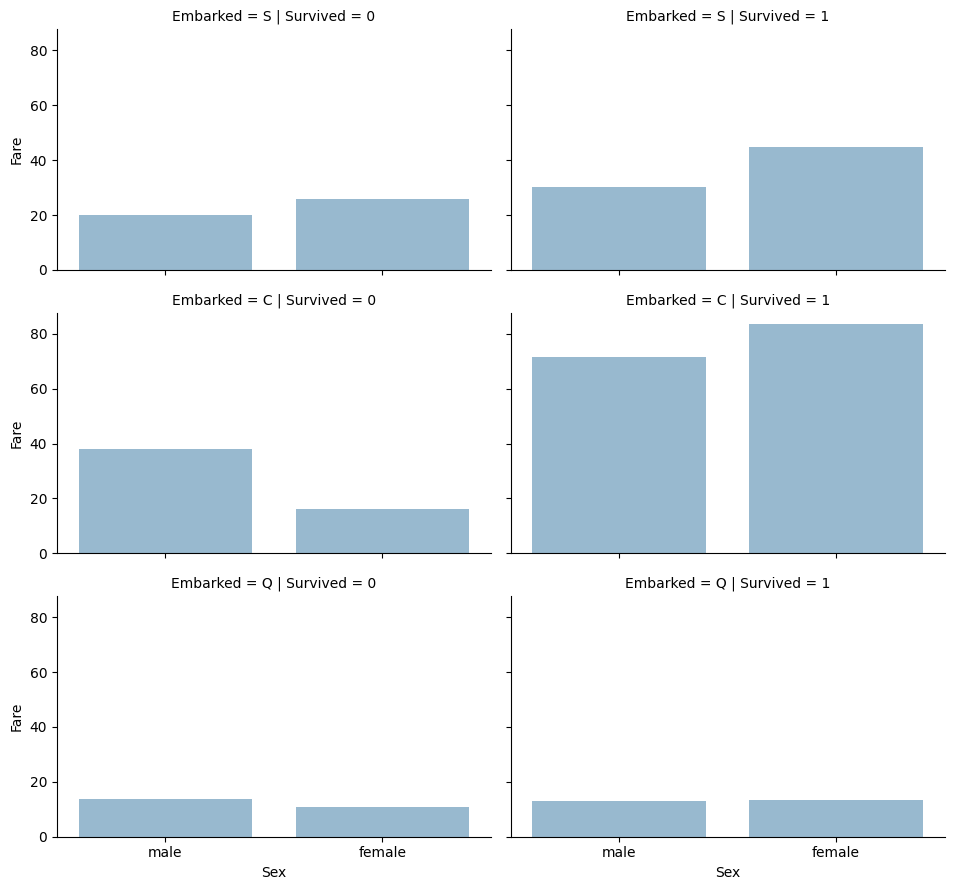

In [13]:
grid = sns.FacetGrid(df_train, row = 'Embarked', col = 'Survived', aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, ci = None)
grid.add_legend()


Wrangle data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.
Correcting by dropping features

This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.


In [14]:
print("Before : ", df_train.shape, df_test.shape)

df_train = df_train.drop(['Ticket','Cabin'],axis = 1)
df_test = df_test.drop(['Ticket','Cabin'], axis = 1)

print("After : ", df_train.shape, df_test.shape)

Before :  (891, 12) (418, 11)
After :  (891, 10) (418, 9)



Creating new feature extracting from existing¶

We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

Observations.

When we plot Title, Age, and Survived, we note the following observations.

    Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
    Survival among Title Age bands varies slightly.
    Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

Decision.

    We decide to retain the new Title feature for model training.



In [15]:
df_train['Title'] = df_train.Name.str.extract('([A-Za-z]+)\.', expand = False)
df_test['Title'] = df_test.Name.str.extract('([A-Za-z]+)\.', expand = False)

# crosstab computes frequency table of the passed factors
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
combine = [df_train, df_test]

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

df_train[['Title','Survived']].groupby(['Title'], as_index = False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [17]:
title_mapping = {'Mr': 1, 'Miss' : 2, 'Mrs': 3, 'Master' : 4, 'Rare' : 5}
for dataset in combine : 
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1




Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.




We can convert the categorical titles to ordinal.

In [18]:
df_train = df_train.drop(['Name', 'PassengerId'], axis = 1)
df_test = df_test.drop(['Name'], axis = 1)
combine = [df_train, df_test]
df_train.shape, df_test.shape

((891, 9), (418, 9))


Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.


In [19]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1



Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

    A simple way is to generate random numbers between mean and standard deviation.

    More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

    Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.


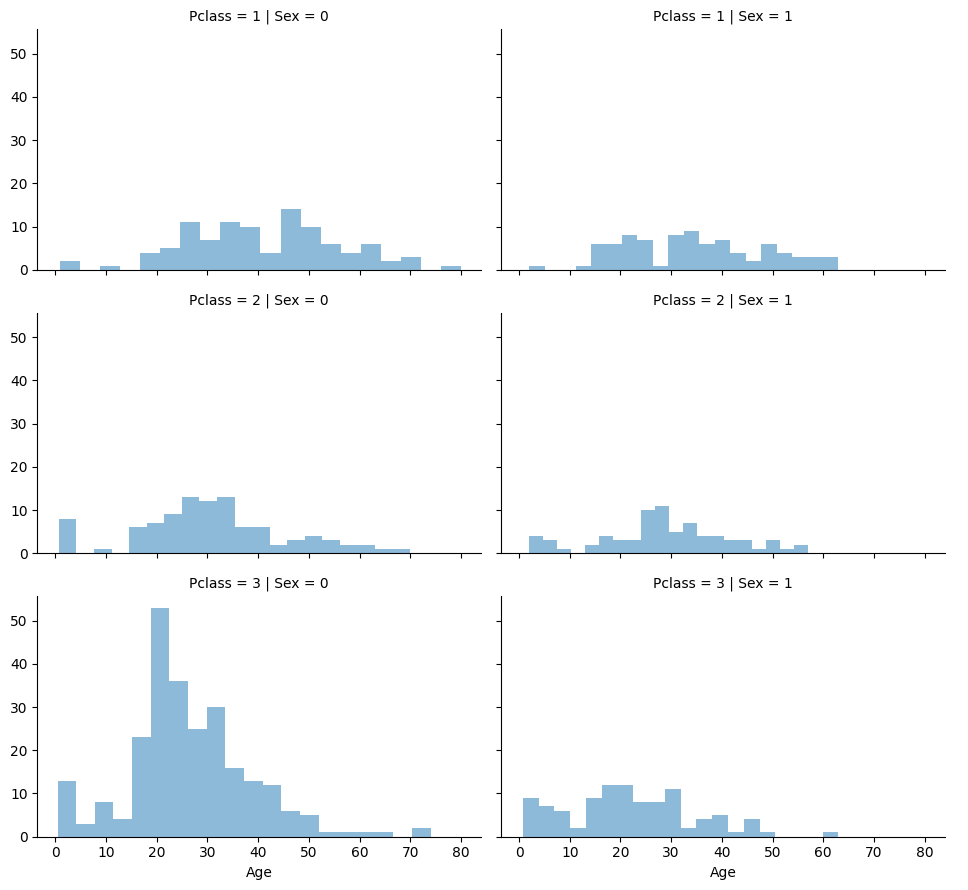

In [20]:
grid = sns.FacetGrid(df_train, row = 'Pclass', col = 'Sex', aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()



Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.


In [21]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations

In [22]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i ) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int ( age_guess/0.5 + 0.5) * 0.5
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1




Let us create Age bands and determine correlations with Survived.


In [23]:
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
# pd.cut is used to bin values
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)

C:\Users\deepa\AppData\Local\Temp\ipykernel_2444\204486967.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [24]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age']> 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age']> 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age']> 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age']> 64), 'Age'] = 4
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [25]:
# We can now remove the AgeBand feature
df_train = df_train.drop(['AgeBand'], axis = 1)
combine = [df_train, df_test]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1



Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.


In [27]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000




We can create another feature called IsAlone.


In [28]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

df_train[['IsAlone','Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538




Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.


In [29]:
df_train = df_train.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
df_test = df_test.drop(['Parch', 'SibSp', 'FamilySize'], axis = 1)
combine = [df_train, df_test]

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [30]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

df_train.loc[:, ['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2



Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.


In [32]:
freq_port = df_train.Embarked.dropna().mode()[0]
freq_port

'S'

In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

df_train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009



Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.


In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6



Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.


In [35]:
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace = True)

df_test.head()

C:\Users\deepa\AppData\Local\Temp\ipykernel_2444\1461503800.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace = True)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


We can now create FareBand

In [39]:
df_train['FareBand'] = pd.qcut(df_train['Fare'],4)

df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', ascending = True)

C:\Users\deepa\AppData\Local\Temp\ipykernel_2444\4264775917.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', ascending = True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [40]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <=14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <=31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df_train = df_train.drop(['FareBand'], axis = 1)
combine = [df_train, df_test]

df_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [41]:
df_test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [ ]:
df_train.to_csv('train_data_clean.csv')
d